# Install required libraries

# Title

"Optimizing Supply Chain Management using Machine Learning to Address Supply Chain Disruptions in Instant Noodles Delivery"

# Business Problem Statement

An FMCG company entered into the instant noodles business two years back. Their higher management has noticed that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both ways, it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in every warehouse in the entire country.


# Goal & Objectives
This exercise aims to build a model, using historical data that will determine the optimum weight of the product to be shipped each time to the warehouse.

Also, try to analyze the demand pattern in different pockets of the country so management can drive the advertisement campaign, particularly in those pockets.

This is the first phase of the agreement; hence, the company has shared very limited information. Once you are able to showcase a tangible impact with this much information then the company will open the 360-degree data lake for your consulting company to build a more robust model.



In [1]:
#!pip install xgboost

# Import necessary packages

In [21]:


import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
#import lux # EDA
from sklearn.preprocessing import MinMaxScaler

# Import Regression Models

In [22]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Importing the Dataset

In [24]:

df = pd.read_csv('SC_Data.csv')
df.head(n=10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,...,1,77,27.0,2010.0,24,0,B,3,6,30142
7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,7183,...,0,241,23.0,NaN,18,0,C,6,24,24093
8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,3869,...,0,78,43.0,NaN,6,0,C,6,2,7130


# Pre Processing activity

In [25]:
df.shape

(25000, 24)

Check for missing values

In [26]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [27]:
df.isnull().sum() / len(df) *100

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

Analyze Data Type of the dataset

Sklearn Approach to Handle All Missing Data at one go

In [28]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputed = pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns = df.columns
df_imputed

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,2000.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,2000.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,2000.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,2000.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,1,147,28.0,2000.0,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,1,60,25.0,2000.0,18,0,A,6,30,25093


In [29]:
df_imputed.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [30]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ware_house_ID                 25000 non-null  object
 1   WH_Manager_ID                 25000 non-null  object
 2   Location_type                 25000 non-null  object
 3   WH_capacity_size              25000 non-null  object
 4   zone                          25000 non-null  object
 5   WH_regional_zone              25000 non-null  object
 6   num_refill_req_l3m            25000 non-null  object
 7   transport_issue_l1y           25000 non-null  object
 8   Competitor_in_mkt             25000 non-null  object
 9   retail_shop_num               25000 non-null  object
 10  wh_owner_type                 25000 non-null  object
 11  distributor_num               25000 non-null  object
 12  flood_impacted                25000 non-null  object
 13  flood_proof     

In [31]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


Finding the unique values in the columns and also check in any special char is present in the data

In [13]:


for i in df_imputed.columns:
    print("************************************",i,"**********************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

************************************ Ware_house_ID **********************

{'WH_111806', 'WH_106966', 'WH_119443', 'WH_104484', 'WH_103269', 'WH_121849', 'WH_113335', 'WH_119769', 'WH_123413', 'WH_107513', 'WH_100256', 'WH_121869', 'WH_117144', 'WH_105845', 'WH_108088', 'WH_118483', 'WH_121469', 'WH_122376', 'WH_117199', 'WH_108218', 'WH_105201', 'WH_105779', 'WH_118964', 'WH_116321', 'WH_108078', 'WH_123362', 'WH_119158', 'WH_115815', 'WH_122657', 'WH_100949', 'WH_123753', 'WH_117180', 'WH_116018', 'WH_108827', 'WH_105148', 'WH_116145', 'WH_116577', 'WH_106181', 'WH_108757', 'WH_119799', 'WH_113868', 'WH_106609', 'WH_110841', 'WH_116989', 'WH_101806', 'WH_123973', 'WH_122360', 'WH_122541', 'WH_122222', 'WH_104639', 'WH_113166', 'WH_112023', 'WH_108603', 'WH_116417', 'WH_119073', 'WH_104520', 'WH_100244', 'WH_111850', 'WH_102577', 'WH_116093', 'WH_114107', 'WH_122555', 'WH_100973', 'WH_119776', 'WH_102060', 'WH_105904', 'WH_112461', 'WH_115740', 'WH_123261', 'WH_107167', 'WH_100419', '

pcv - nwq
wc - nwq
rc - num with quot
dm- char
cad - char
classification - char

In [14]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ware_house_ID                 25000 non-null  object
 1   WH_Manager_ID                 25000 non-null  object
 2   Location_type                 25000 non-null  object
 3   WH_capacity_size              25000 non-null  object
 4   zone                          25000 non-null  object
 5   WH_regional_zone              25000 non-null  object
 6   num_refill_req_l3m            25000 non-null  object
 7   transport_issue_l1y           25000 non-null  object
 8   Competitor_in_mkt             25000 non-null  object
 9   retail_shop_num               25000 non-null  object
 10  wh_owner_type                 25000 non-null  object
 11  distributor_num               25000 non-null  object
 12  flood_impacted                25000 non-null  object
 13  flood_proof     

Convert all data type which are non object to float

In [32]:
for i in df.select_dtypes(exclude=["object"]).columns :
    df_imputed[i] = df_imputed[i].apply(lambda x:float(x))

In [33]:
df_imputed.dtypes

Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m              float64
transport_issue_l1y             float64
Competitor_in_mkt               float64
retail_shop_num                 float64
wh_owner_type                    object
distributor_num                 float64
flood_impacted                  float64
flood_proof                     float64
electric_supply                 float64
dist_from_hub                   float64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m      float64
temp_reg_mach                   float64
approved_wh_govt_certificate     object
wh_breakdown_l3m                float64
govt_check_l3m                  float64
product_wg_ton                  float64
dtype: object

Drop unwanted features

In [34]:
df_imputed = df_imputed.drop(['Ware_house_ID'], axis=1)
df_imputed = df_imputed.drop(['WH_Manager_ID'], axis=1)
df_imputed = df_imputed.drop(['wh_est_year'], axis=1)
df_imputed = df_imputed.drop(['wh_owner_type'], axis=1)
df_imputed = df_imputed.drop(['flood_impacted'], axis=1)
df_imputed = df_imputed.drop(['flood_proof'], axis=1)
df_imputed = df_imputed.drop(['electric_supply'], axis=1)
df_imputed = df_imputed.drop(['temp_reg_mach'], axis=1)
df_imputed = df_imputed.drop(['govt_check_l3m'], axis=1)
df_imputed = df_imputed.drop(['wh_breakdown_l3m'], axis=1)


In [35]:
df_imputed.dtypes

Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m              float64
transport_issue_l1y             float64
Competitor_in_mkt               float64
retail_shop_num                 float64
distributor_num                 float64
dist_from_hub                   float64
workers_num                     float64
storage_issue_reported_l3m      float64
approved_wh_govt_certificate     object
product_wg_ton                  float64
dtype: object

Encode textual data

In [36]:
df_imputed.head()
le = LabelEncoder()

In [37]:
df_imputed['Location_type'] = le.fit_transform(df_imputed.Location_type)
df_imputed['WH_capacity_size'] = le.fit_transform(df_imputed.WH_capacity_size)
df_imputed['zone'] = le.fit_transform(df_imputed.zone)
df_imputed['WH_regional_zone'] = le.fit_transform(df_imputed.WH_regional_zone)
df_imputed['approved_wh_govt_certificate'] = le.fit_transform(df_imputed.approved_wh_govt_certificate)

In [38]:
df_imputed.dtypes

Location_type                     int32
WH_capacity_size                  int32
zone                              int32
WH_regional_zone                  int32
num_refill_req_l3m              float64
transport_issue_l1y             float64
Competitor_in_mkt               float64
retail_shop_num                 float64
distributor_num                 float64
dist_from_hub                   float64
workers_num                     float64
storage_issue_reported_l3m      float64
approved_wh_govt_certificate      int32
product_wg_ton                  float64
dtype: object

Seperate features and target variable

In [39]:
x = df_imputed.drop(['product_wg_ton'], axis=1)
y = df_imputed['product_wg_ton']

Scale the features

In [40]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x)

Applying PCA method to reduce non-significant variables and values (if any)

In [41]:
pca = PCA(0.95)
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(25000, 13)
(25000, 10)


# Data Visualization

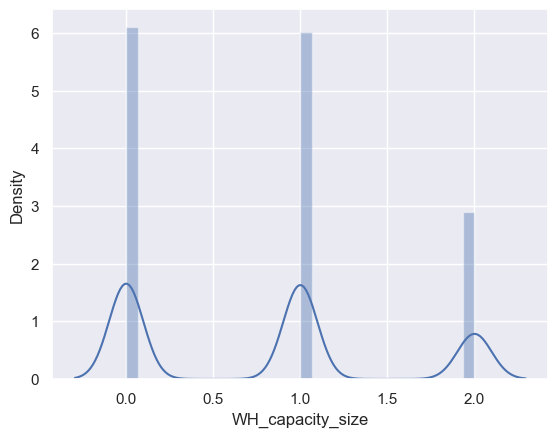

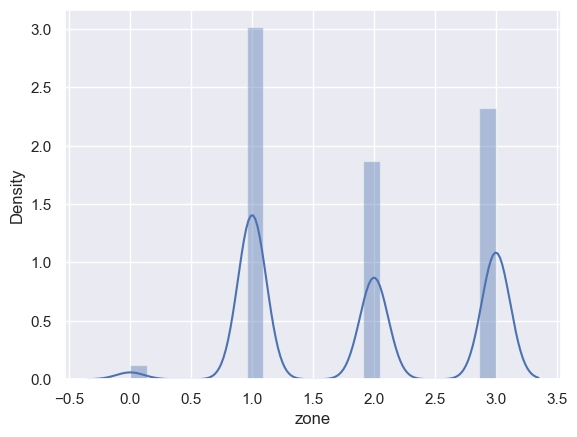

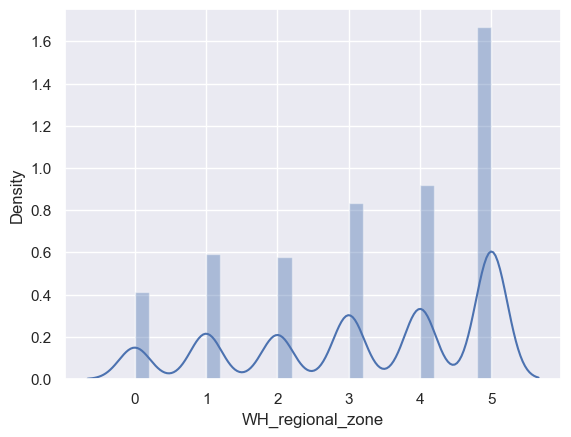

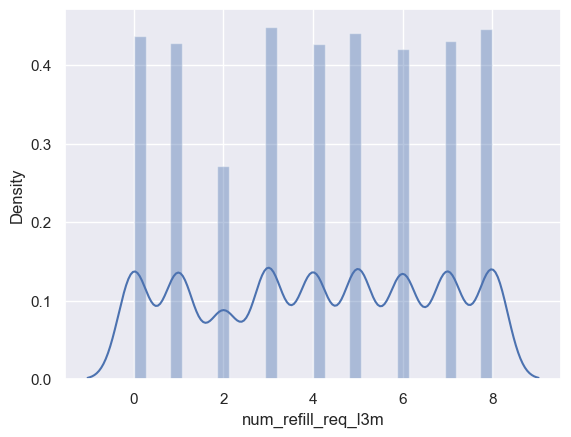

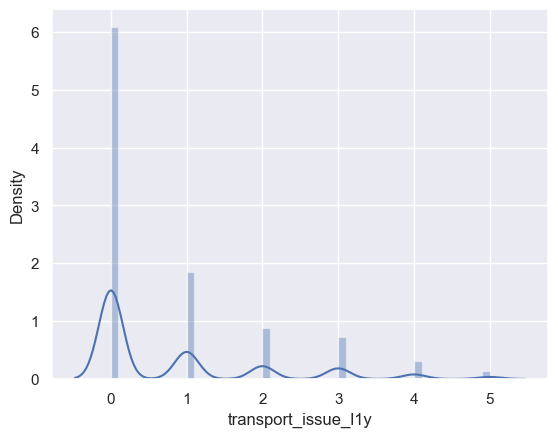

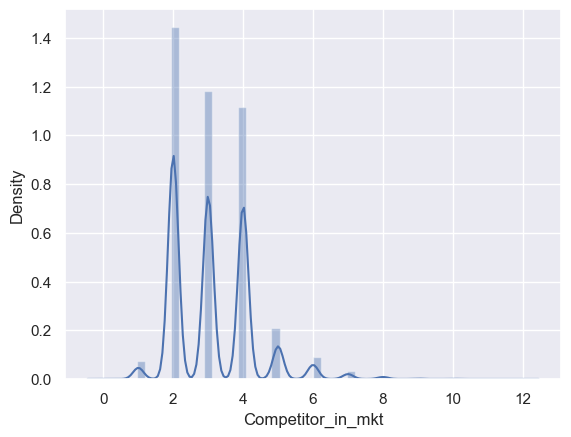

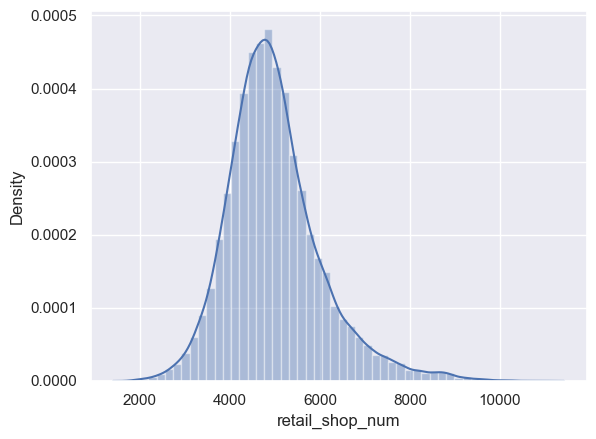

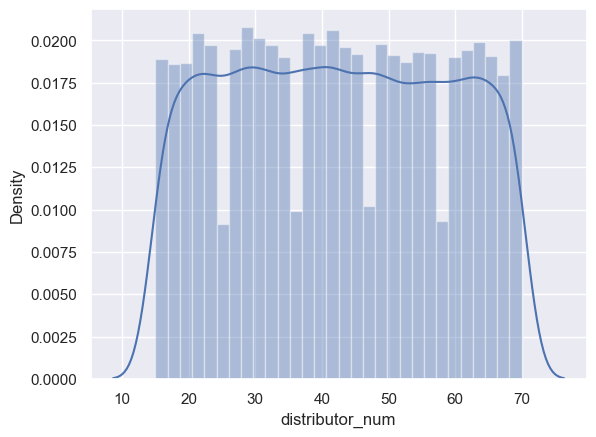

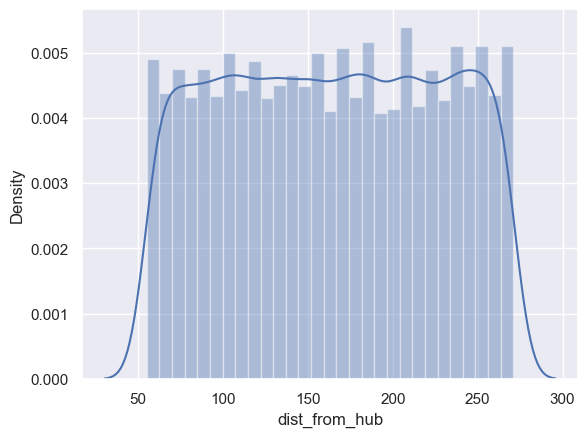

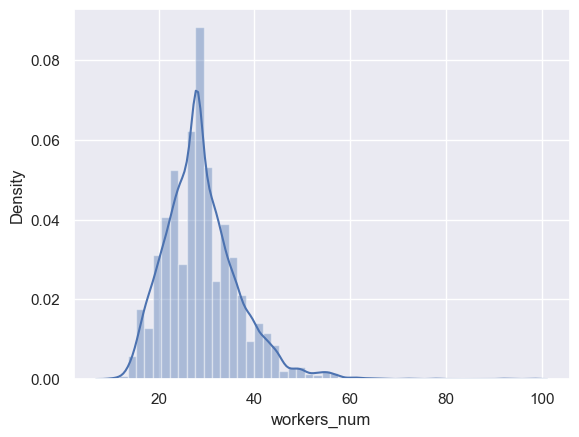

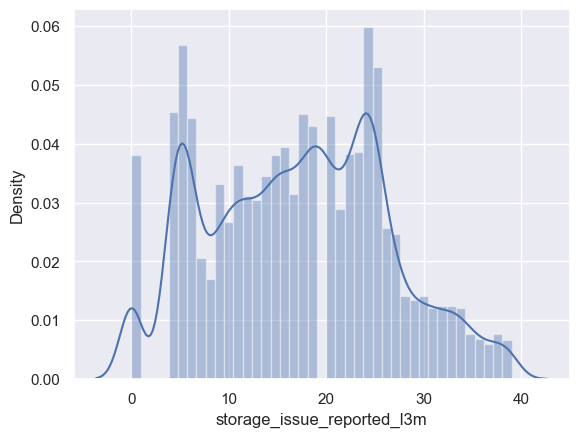

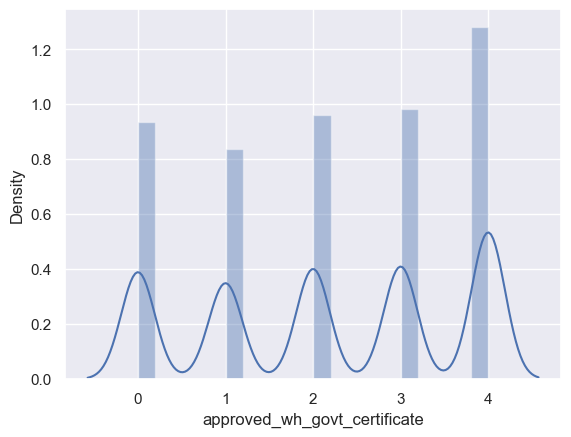

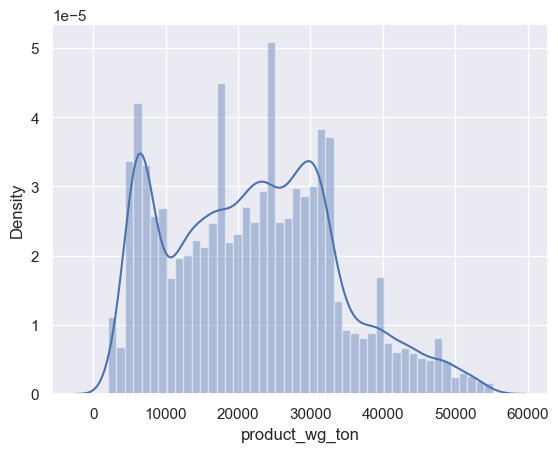

In [42]:
def distplots(col):
    sns.distplot(df_imputed[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=['object']).columns)[1:]:
    distplots(i)

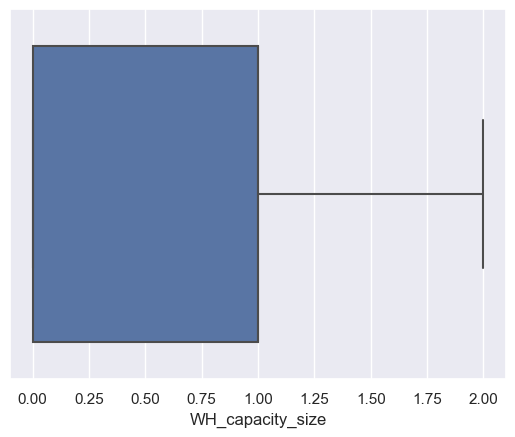

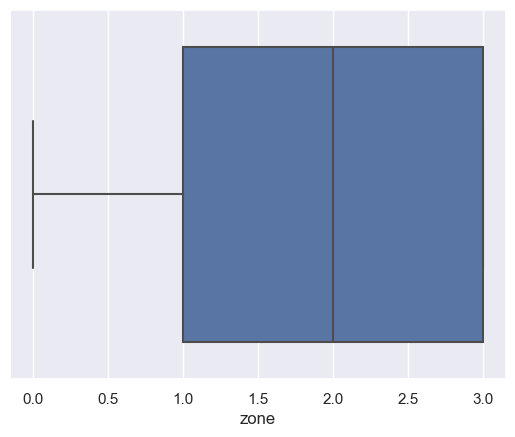

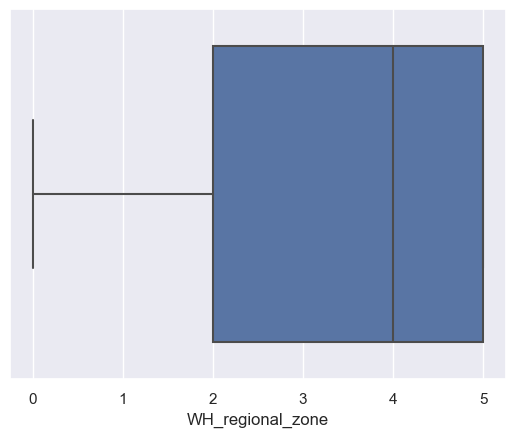

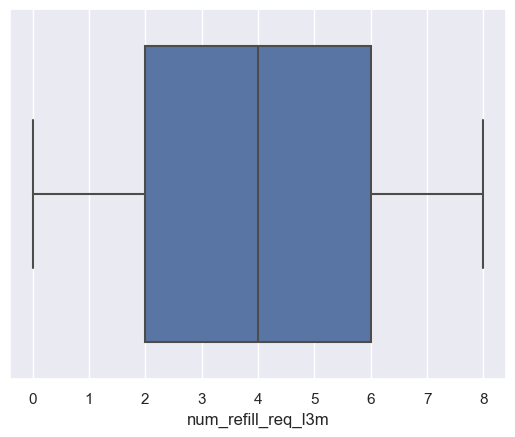

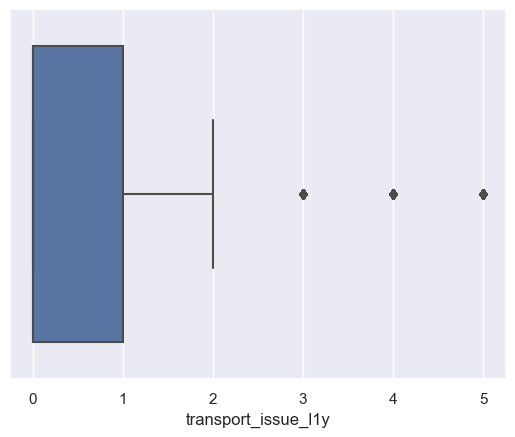

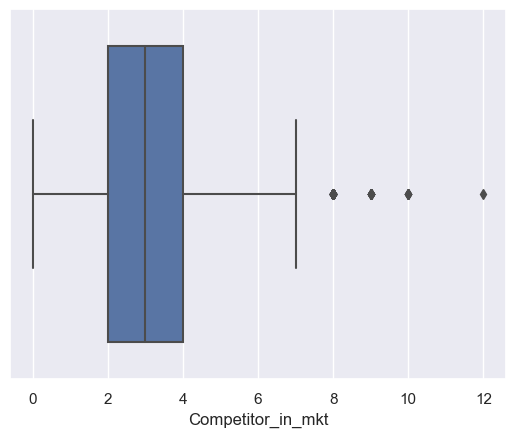

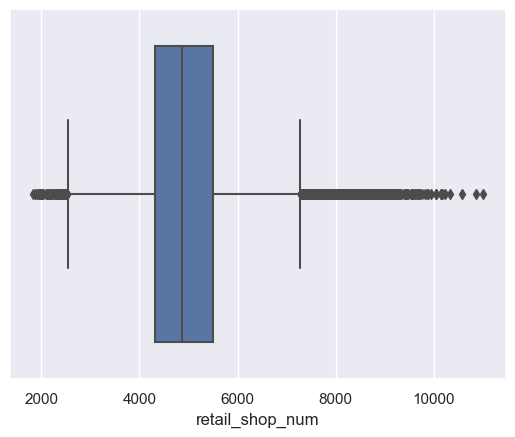

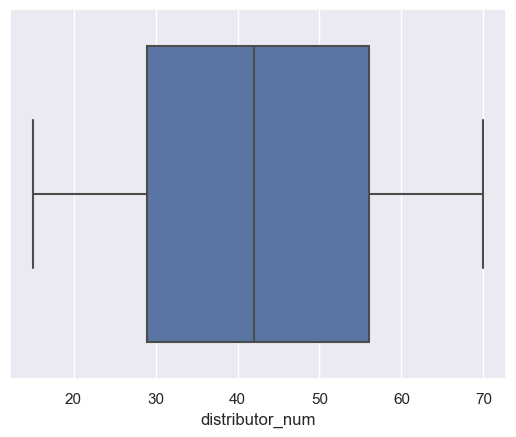

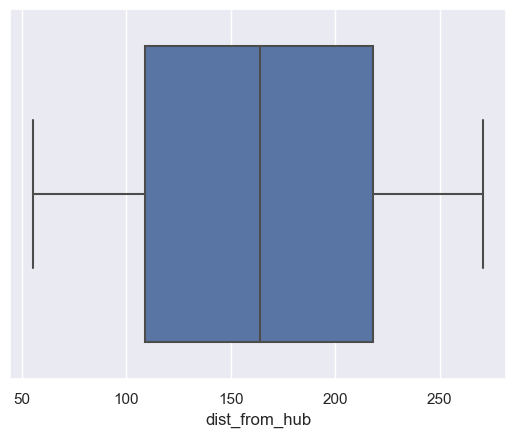

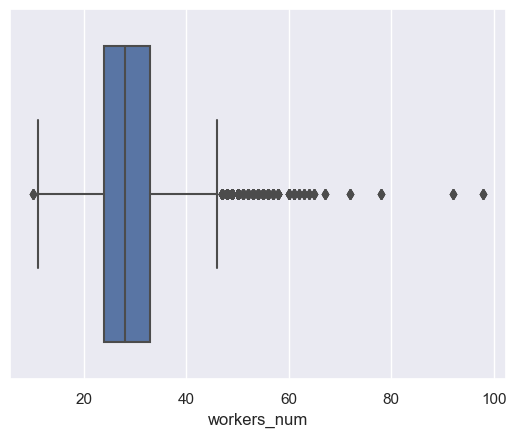

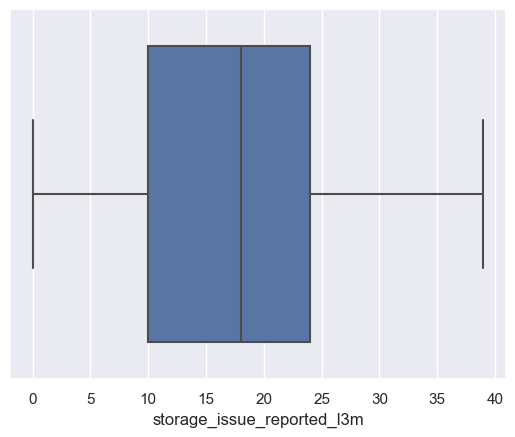

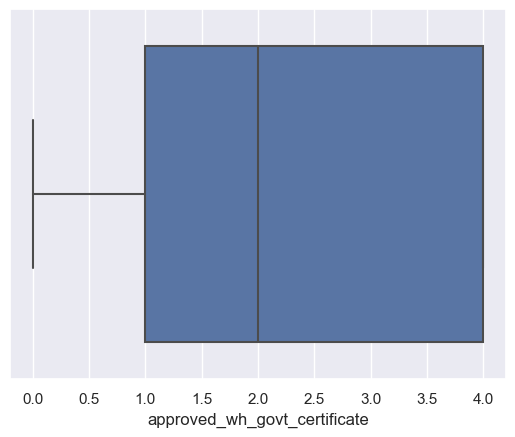

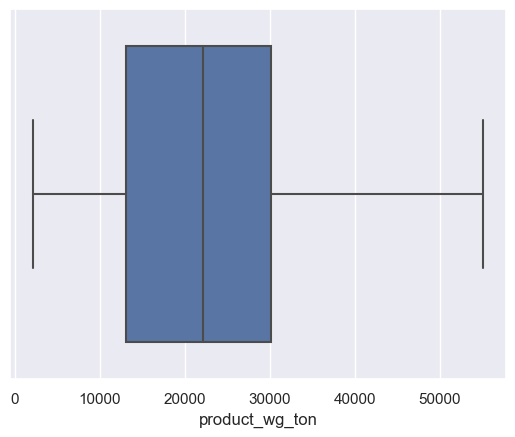

In [43]:
# Find and remove outliers of data

def boxplots(col):
    sns.boxplot(df_imputed[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

<AxesSubplot:>

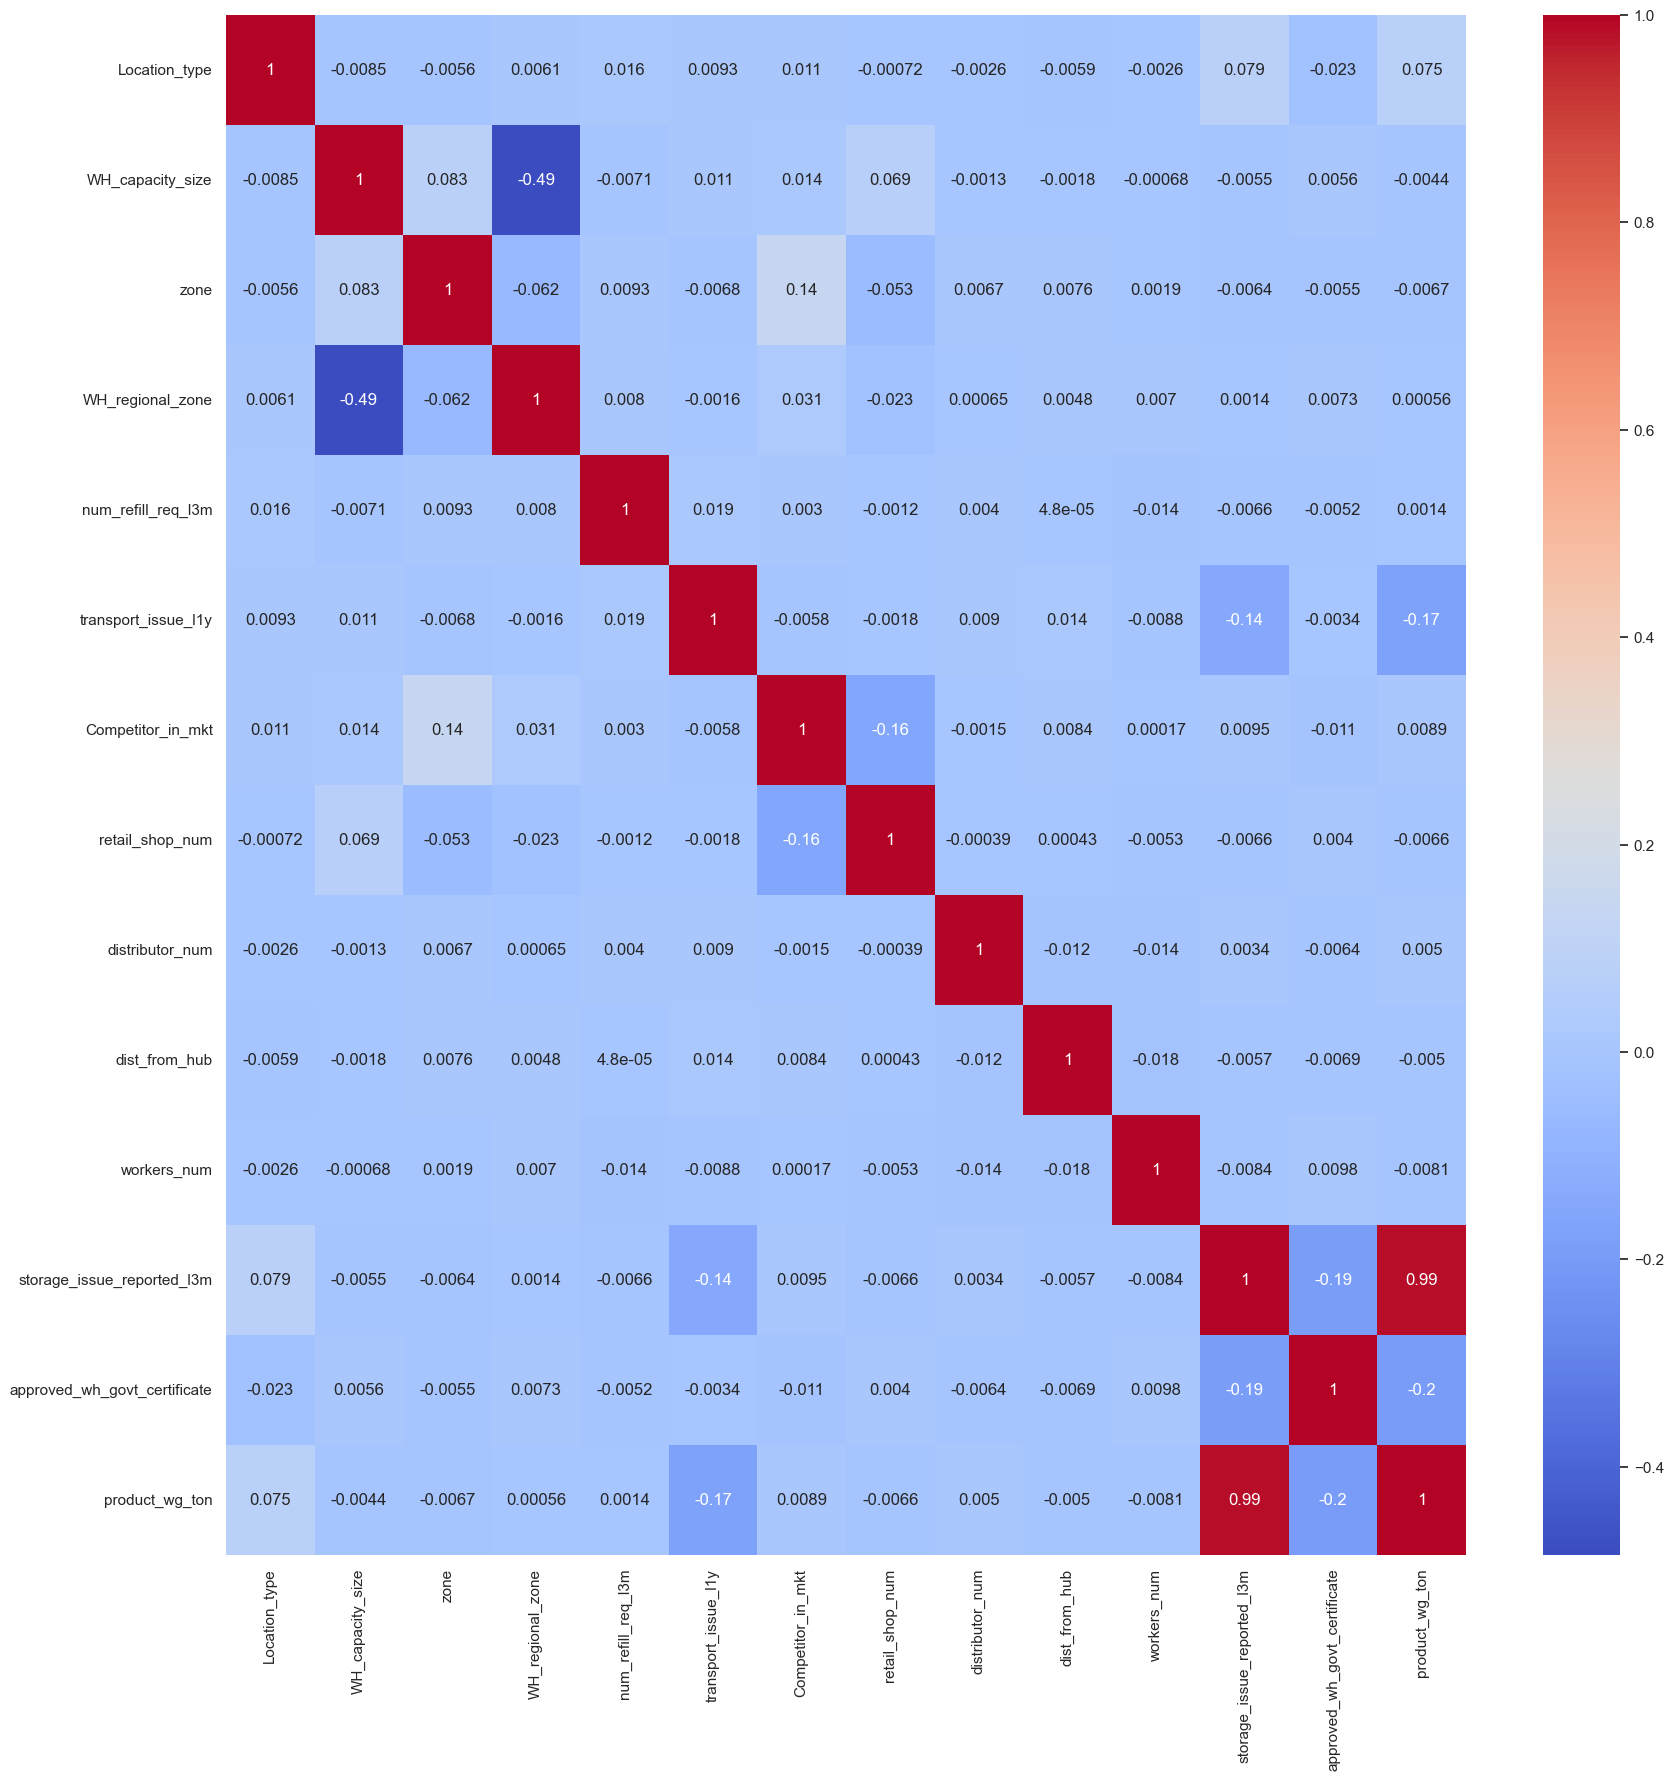

In [44]:
# Finding the correlation 

plt.figure(figsize=(20,20))
corr = df_imputed.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Model  Building, Training and Prediction and Accuracy calculation

split the data into training and test for building the model and prediction with test dataset

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=5)

In [46]:
X = x_pca
Y = y

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.20)

Build model and score identification based on r2 score using differnt regression algorithm

In [48]:
linearreg = LinearRegression()
linearreg.fit(xtrain, ytrain)
ypred_lnr = linearreg.predict(xtest)

In [49]:
score_lnr = r2_score(ytest, ypred_lnr)
print("The accuracy of our LinearRegression model is {}%".format(round(score_lnr, 2) *100))

The accuracy of our LinearRegression model is 97.0%


In [50]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)
ypred_dtr = dtr.predict(xtest)

In [51]:
score_dtr = r2_score(ytest, ypred_dtr)
print("The accuracy of our DecisionTreeRegressor model is {}%".format(round(score_dtr, 2) *100))

The accuracy of our DecisionTreeRegressor model is 97.0%


In [52]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)
ypred_rfr = rfr.predict(xtest)

In [53]:
score_rfr = r2_score(ytest, ypred_rfr)
print("The accuracy of our RandomForestRegressor model is {}%".format(round(score_rfr, 2) *100))

The accuracy of our RandomForestRegressor model is 99.0%


In [54]:
rfr_2 = RandomForestRegressor(max_depth=2, random_state=0)
rfr_2.fit(xtrain, ytrain)
ypred_rfr2 = rfr_2.predict(xtest)

In [55]:
score_rfr2 = r2_score(ytest, ypred_rfr2)
print("The accuracy of our RandomForestRegressor with Parameters model is {}%".format(round(score_rfr2, 2) *100))

The accuracy of our RandomForestRegressor with Parameters model is 59.0%


In [56]:
svr =SVR()
svr.fit(xtrain, ytrain)
ypred_svr = svr.predict(xtest)

In [57]:
score_svr = r2_score(ytest, ypred_svr)
print("The accuracy of our SVR model is {}%".format(round(score_svr, 2) *100))

The accuracy of our SVR model is 6.0%


In [58]:
knr =KNeighborsRegressor()
knr.fit(xtrain, ytrain)
ypred_knr = knr.predict(xtest)

In [59]:
score_knr = r2_score(ytest, ypred_knr)
print("The accuracy of  KNeighborsRegressor our model is {}%".format(round(score_knr, 2) *100))

The accuracy of  KNeighborsRegressor our model is 89.0%


In [60]:
pr = PoissonRegressor()
pr.fit(xtrain, ytrain)
ypred_pr = pr.predict(xtest)

In [61]:
score_pr = r2_score(ytest, ypred_pr)
print("The accuracy of  PoissonRegressor our model is {}%".format(round(score_pr, 2) *100))

The accuracy of  PoissonRegressor our model is 91.0%


In [62]:
xgb_upd = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb_upd.fit(xtrain, ytrain)
ypred_xgb_upd = xgb_upd.predict(xtest)

In [63]:
score_xgb_upd = r2_score(ytest, ypred_xgb_upd)
print("The accuracy of  XGBRegressor with parameters our model is {}%".format(round(score_xgb_upd, 2) *100))


The accuracy of  XGBRegressor with parameters our model is 99.0%


In [64]:
xgb_upd2 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=1)
xgb_upd2.fit(xtrain, ytrain)
ypred_xgb_upd2 = xgb_upd2.predict(xtest)

In [65]:
score_xgb_upd2 = r2_score(ytest, ypred_xgb_upd2)
print("The accuracy of  XGBRegressor with parameters our model is {}%".format(round(score_xgb_upd2, 2) *100))

The accuracy of  XGBRegressor with parameters our model is 99.0%


In [66]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error')
gbr.fit(xtrain, ytrain)
ypred_gbr = gbr.predict(xtest)

In [67]:
score_gbr = r2_score(ytest, ypred_gbr)
print("The accuracy of  GradientBoostingRegressor vanila our model is {}%".format(round(score_gbr, 2) *100))

The accuracy of  GradientBoostingRegressor vanila our model is 91.0%


In [68]:
abr = AdaBoostRegressor(random_state=0, n_estimators=100)
abr.fit(xtrain, ytrain)
ypred_abr = abr.predict(xtest)

In [69]:
score_abr = r2_score(ytest, ypred_abr)
print("The accuracy of  AdaBoostRegressor vanila our model is {}%".format(round(score_abr, 2) *100))

The accuracy of  AdaBoostRegressor vanila our model is 90.0%


# The accuracy of  XGBRegressor with parameters our model is 99.0%